##TF
#preguntas 1 y 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('bike_buyers.csv')

In [3]:
#Generar la cabeza del esquema
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [4]:
df['Purchased Bike'] = df['Purchased Bike'].replace({'No': 0, 'Yes': 1})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 101.7+ KB


In [7]:
df_index = df['ID']
df = df.drop(['ID'], axis = 1)

##Heatmap


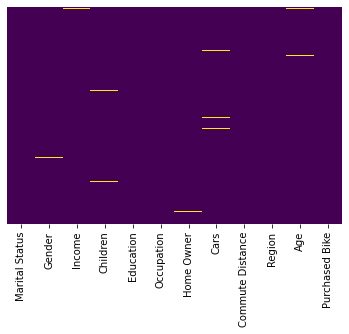

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

sa

In [9]:
df.isna().sum().sort_values()

Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
Home Owner           4
Income               6
Marital Status       7
Children             8
Age                  8
Cars                 9
Gender              11
dtype: int64

En los compradores de bicicleta, hay muchas personas a las que se desconoce si no tienen hogar, su genero, si tienen hijos, si tienen carro entre otros.


In [10]:
#Dado a que en en Income hay bastantes NaN, entonces se les va a reemplazar con la siguiente formula:
def fx_porc_missings(data, only_missings = False):

    df_vars_missings = pd.concat([pd.DataFrame(data.isnull().sum(), columns = ['n_nulos']),
           pd.DataFrame(100*data.isnull().sum()/len(data), columns = ['%Total'])], axis = 1)
    if only_missings:
        return(df_vars_missings[df_vars_missings["n_nulos"]!=0])
    else:
        return(df_vars_missings) 


##Limpieza de Datos

In [11]:
numericas= df.select_dtypes(include=['float64', 'int'])

In [12]:
numericas.describe()

,Income,Children,Cars,Age,Purchased Bike
count,994.000000,992.000000,991.000000,992.000000,1000.000000
mean,56267.605634,1.910282,1.455096,44.181452,0.481000
std,31067.817462,1.626910,1.121755,11.362007,0.499889
min,10000.000000,0.000000,0.000000,25.000000,0.000000
25%,30000.000000,0.000000,1.000000,35.000000,0.000000
50%,60000.000000,2.000000,1.000000,43.000000,0.000000
75%,70000.000000,3.000000,2.000000,52.000000,1.000000
max,170000.000000,5.000000,4.000000,89.000000,1.000000


In [13]:
for column in numericas:
    df[column] = df[column].fillna(df[column].mean())

In [14]:
categoricas = df.select_dtypes(include=['object','category'])

In [15]:
categoricas.describe()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region
count,993,989,1000,1000,996,1000,1000
unique,2,2,5,5,2,5,3
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America
freq,535,500,306,276,682,366,508


In [16]:
for column in categoricas:
    df[column] = df[column].fillna(df[column].mode()[0]) 

In [17]:
df['Commute Distance'] = df['Commute Distance'].replace({'0-1 Miles': 0,'1-2 Miles': 1, '10+ Miles': 4, '2-5 Miles': 2, '5-10 Miles': 3})

##Comparar variables numericas vs el purchase bike


In [18]:
numerics = df.select_dtypes(include=['float64', 'int'])

In [19]:
numerics

,Income,Children,Cars,Commute Distance,Age,Purchased Bike
0,40000.0,1.0,0.0,0,42.0,0
1,30000.0,3.0,1.0,0,43.0,0
2,80000.0,5.0,2.0,2,60.0,0
3,70000.0,0.0,1.0,3,41.0,1
4,30000.0,0.0,0.0,0,36.0,1
...,...,...,...,...,...,...
995,60000.0,2.0,2.0,2,54.0,1
996,70000.0,4.0,0.0,2,35.0,1
997,60000.0,2.0,0.0,0,38.0,1
998,100000.0,3.0,3.0,1,38.0,0


##Purchased Bike e Income
Queremos completar los datos de edad que faltan en lugar de simplemente eliminar las filas de datos de edad que faltan. Una forma de hacerlo es completando la edad media de todos los pasajeros (imputación). Sin embargo, podemos ser más inteligentes al respecto y verificar la edad promedio por clase de pasajero. Por ejemplo:

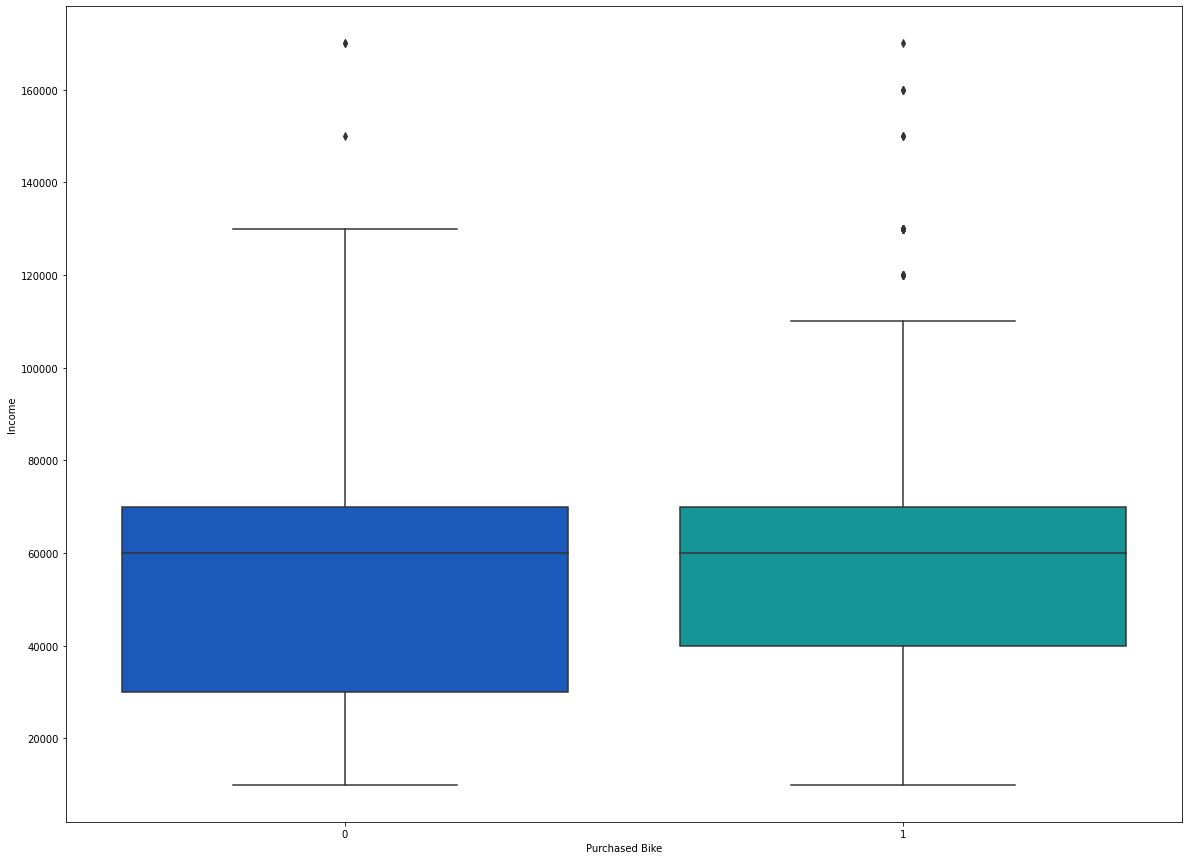

In [20]:
plt.figure(figsize=(20, 15))
sns.boxplot(x='Purchased Bike',y='Income',data=df,palette='winter')

In [21]:
df.groupby('Purchased Bike')[['Income']].mean()

,Income
Purchased Bike,
0,54874.759152
1,57770.489883


Podemos ver que por poco margen, las personas que comparon bicicleta tienen mayor Income que los que no han comprado bicicleta.

In [26]:
#limpiando datos
bike_sub = df[['Income','Gender','Purchased Bike']]

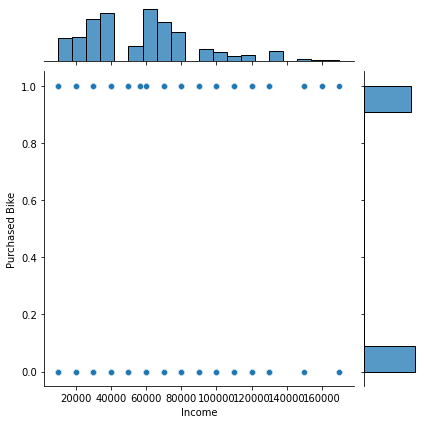

In [30]:
sns.jointplot( data = bike_sub, x= 'Income',y = 'Purchased Bike', kind = 'scatter')